<a href="https://colab.research.google.com/github/noelivander/AVD-UTS/blob/main/Student_Marks_Dataset_with_Decission_Tree_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mengimport semua package yang dibutuhkan

In [ ]:
import sys
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt

load dataset, dan menampilkan dataset yang akan digunakan

In [ ]:
df = pd.read_csv('Student_Marks.csv')
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


**Lakukan visualisasi data terlebih dahulu untuk mengeksplorasi data**

menampilkan struktur dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


menampilkan barchart time_study

array([[<Axes: title={'center': 'time_study'}>]], dtype=object)

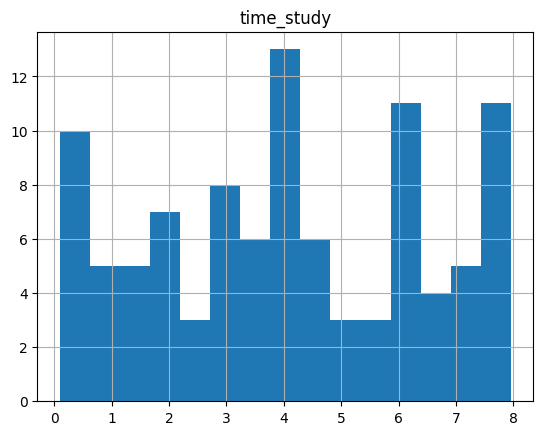

In [ ]:
df.hist(column="time_study",bins=15)

menampilkan barchart number_courses

array([[<Axes: title={'center': 'number_courses'}>]], dtype=object)

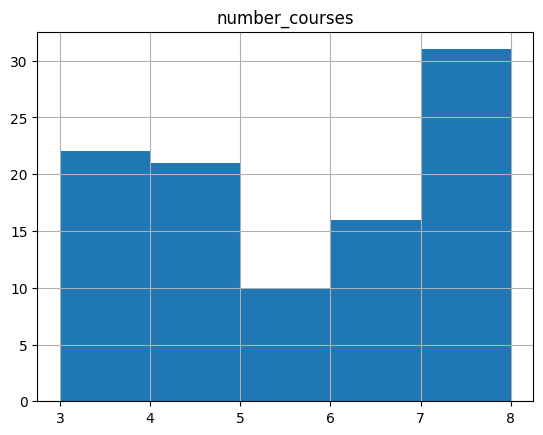

In [ ]:
df.hist(column='number_courses', bins=5)

**Persiapan Data**

*   Membuat kelompok Feature atau variabel bebas tersendiri
*   Membuat kelompok labels atau variabel terikat tersendiri



In [ ]:
df.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

x sebagai variable independen.
menampilkan 5 isi/array dalam kolom dataset yang digunakan

In [ ]:
X = df[['number_courses', 'time_study']] .values  #.astype(float)
X[0:5]

array([[3.   , 4.508],
       [4.   , 0.096],
       [4.   , 3.133],
       [6.   , 7.909],
       [8.   , 7.811]])

y sebagai variable dependen. menampilkan 5 isi/array dalam kolom marks

In [ ]:
y = df['Marks'].values
y[0:5]

array([19.202,  7.734, 13.811, 53.018, 55.299])

**Membagi data menjadi data training dan testing**

membagi proporsi sebesar 30% data testing, dan 70% data training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (70, 2) (70,)
Test set: (30, 2) (30,)


label asli

In [ ]:
y_test

array([42.426,  6.185, 29.889, 12.591,  5.609, 16.106, 12.027, 19.771,
        6.623, 19.466, 38.278, 30.862, 13.416, 41.444, 17.171,  6.217,
       44.099, 28.043, 51.343,  8.924,  7.014, 24.318, 20.348, 55.299,
        6.349, 23.149, 38.49 , 13.562, 22.701, 40.602])

**Regresi Decision Tree**

mengimport decision tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

**1. Training atau melatih model**

proses melatih model decision tree

In [59]:
model_dt = DecisionTreeRegressor(criterion = 'squared_error', random_state = 0)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

**2. Prediksi data testing**

prediksi nilai target pada data uji. menampilkan 5 hasil prediksi pertama

In [60]:
predTree = model_dt.predict(X_test)
predTree[0:5]

array([41.358,  6.053, 31.236, 12.132,  6.053])

5 nilai asli (label sebenarnya) dari data uji untuk dibandingkan dengan hasil prediksi

In [61]:
print (y_test[0:5])

[42.426  6.185 29.889 12.591  5.609]


**3. Evaluasi Akurasi Model**

menghitung dan mencetak nilai r² score

In [62]:
from sklearn import metrics

print("R² score:", metrics.r2_score(y_test, predTree))

R² score: 0.991020064184219


**KESIMPULAN**

Berdasarkan hasil pengujian model menggunakan metode Decision Tree Regression dengan proporsi data latih 70% dan data uji 30%, diperoleh nilai R² sebesar 0.991, yang menunjukkan bahwa model mampu menjelaskan sekitar 99,1% variasi nilai siswa (Marks) berdasarkan jumlah mata kuliah (number_courses) dan terutama durasi waktu belajar (time_study). Nilai R² yang sangat tinggi ini mengindikasikan bahwa model memiliki performa yang sangat baik dalam memprediksi nilai siswa pada data uji. Dengan tingkat akurasi yang tinggi tersebut, Decision Tree Regression dapat dijadikan pendekatan yang efektif untuk memprediksi nilai siswa berdasarkan faktor-faktor yang diberikan.